# 1 Facebook network
## 1.1 Structural properties of the facebook network

In [1]:
library(igraph)
g = read.graph("facebook_combined.txt", format="edgelist", directed=FALSE)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
if (is.connected(g) == TRUE){
    print("The facebook network is connected.")
    print(sprintf("The network has %s nodes and %s edges.", vcount(g), ecount(g)))
    print(sprintf("The diameter of the network is %s", diameter(g)))
}else{
    print ("The facebook network is not connected.")
    g.components = clusters(g)
    ix <- which.max(g.components$csize)
    g.giant <- induced.subgraph(g, which(g.components$membership == ix))
    print(sprintf("The giant connected componet has %s nodes and %s edges.", vcount(g.giant), ecount(g.giant)))
    print(sprintf("The diameter of the GCC is %s", diameter(g.giant)))
}

[1] "The facebook network is connected."
[1] "The network has 4039 nodes and 88234 edges."
[1] "The diameter of the network is 8"


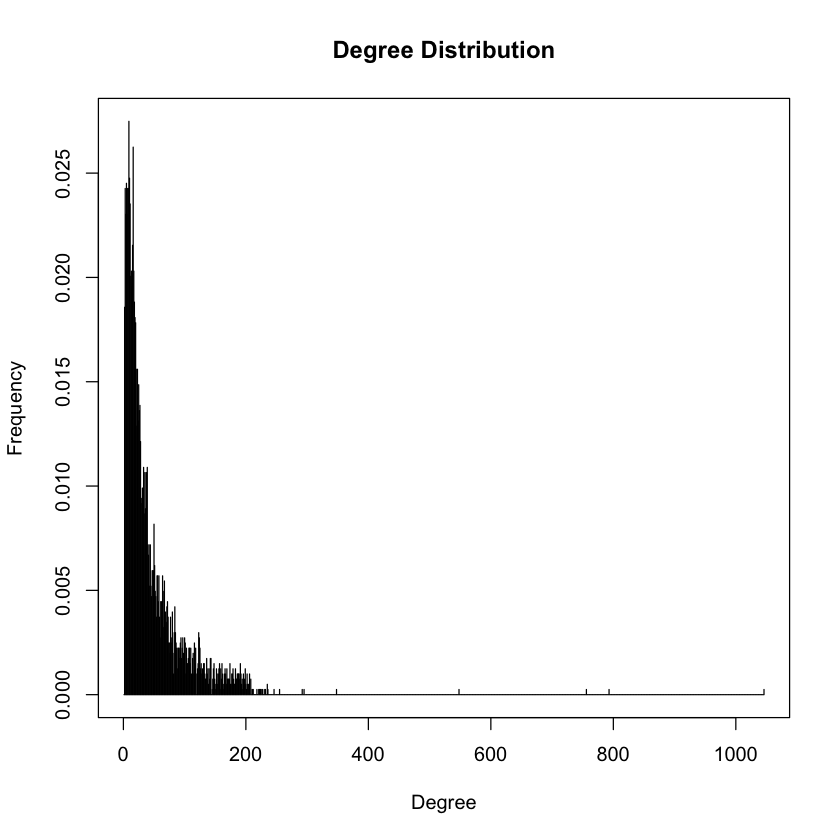

In [3]:
deg_dis = degree_distribution(g)
plot(deg_dis, type = "h", main = "Degree Distribution", xlab = "Degree", ylab = "Frequency")

In [4]:
print(sprintf("The average degree is %s.", mean(degree(g))))

[1] "The average degree is 43.6910126268878."


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“819 y values <= 0 omitted from logarithmic plot”

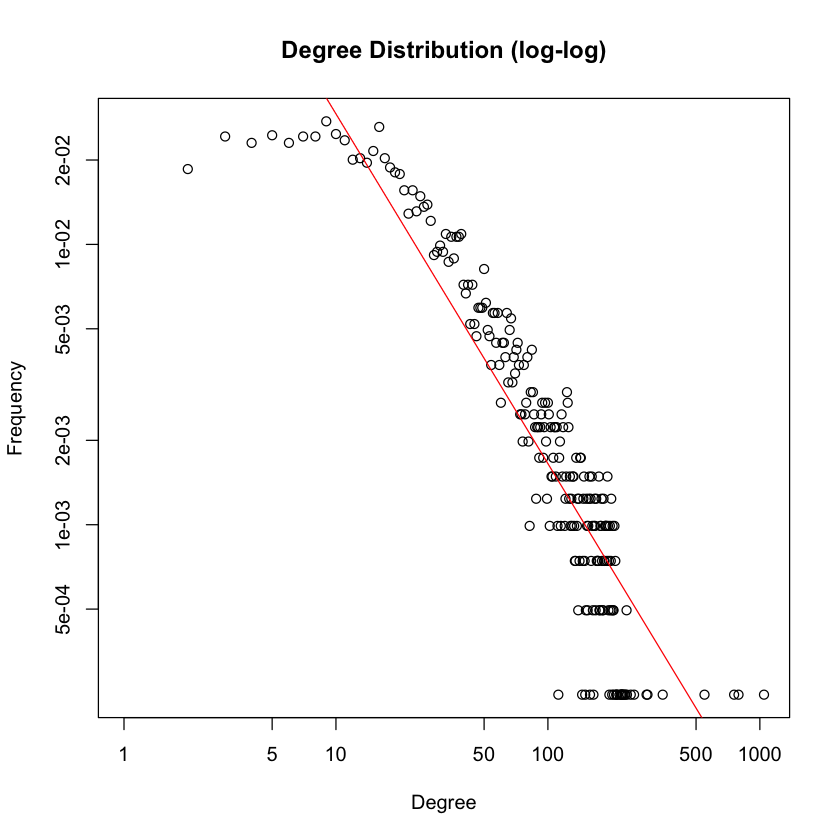

In [5]:
plot(deg_dis, log = "xy", main = "Degree Distribution (log-log)", xlab = "Degree", ylab = "Frequency")
fitted_line = lm(log10(deg_dis) ~ log10(1:length(deg_dis)), subset = deg_dis > 0)
abline(fitted_line, col = 'red')

In [6]:
slope <- summary(fitted_line)$coefficients[2]
print(sprintf("The estimated slope is %s.", slope))

[1] "The estimated slope is -1.24752626790776."


## 1.2 Personalized network

In [7]:
g_1 = induced_subgraph(g, c(1, neighbors(g,1)))
print(sprintf("The personalized network of node 1 has %s nodes and %s edges.", vcount(g_1), ecount(g_1)))
print(sprintf("Its diamater is %s.", diameter(g_1)))

[1] "The personalized network of node 1 has 348 nodes and 2866 edges."
[1] "Its diamater is 2."


In [18]:
eccentricity(g_1)

[1] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[297] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[334] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [19]:
radius(g_1)

[1] 1